In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter
import matplotlib.ticker as mtick

In [2]:
#reading elte 1 minute data
df_1m = pd.read_pickle('/Volumes/Seagate Backup Plus Drive/data_1/Data_ELTE_1min.pkl')
df_p = pd.read_csv('/Users/varungandhi/Downloads/python_notebooks/inter_p.csv')

In [3]:
# for january to 11 march  
df_1j_m = df_1m[(df_1m['TIMESTAMP'] >= '2021-01-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2021-03-11 13:13:00')]
df_2j_m = df_p[(df_p['TIMESTAMP_UTC'] >= '2021-01-01 00:00:00') & (df_p['TIMESTAMP_UTC'] <= '2021-03-11 13:13:00')]

# for 20 nov to dec end 
df_1n_d = df_1m[(df_1m['TIMESTAMP'] >= '2020-11-20 16:22:00') & (df_1m['TIMESTAMP'] <= '2020-12-31 23:59:00')]
df_2n_d = df_p[(df_p['TIMESTAMP_UTC']>= '2020-11-20 16:22:00')&(df_p['TIMESTAMP_UTC'] <= '2020-12-31 23:59:00')]

In [4]:
df_1n_d.rename(columns= {'TIMESTAMP':'TIMESTAMP_UTC'},inplace= True)
df_1j_m.rename(columns= {'TIMESTAMP':'TIMESTAMP_UTC'},inplace= True)

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5461/2450348322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1n_d.rename(columns= {'TIMESTAMP':'TIMESTAMP_UTC'},inplace= True)
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5461/2450348322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1j_m.rename(columns= {'TIMESTAMP':'TIMESTAMP_UTC'},inplace= True)


In [5]:
#delete the columns of the pressure data frame 
del df_2j_m['Unnamed: 0']
del df_2n_d['Unnamed: 0']
df_2j_m['TIMESTAMP_UTC'] = pd.to_datetime(df_2j_m['TIMESTAMP_UTC'])
df_2n_d['TIMESTAMP_UTC'] = pd.to_datetime(df_2n_d['TIMESTAMP_UTC'])


/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5461/4261406613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2j_m['TIMESTAMP_UTC'] = pd.to_datetime(df_2j_m['TIMESTAMP_UTC'])
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5461/4261406613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2n_d['TIMESTAMP_UTC'] = pd.to_datetime(df_2n_d['TIMESTAMP_UTC'])


In [6]:
j_m_tower = pd.merge(df_1j_m, df_2j_m, on = 'TIMESTAMP_UTC')
n_d_tower = pd.merge(df_1n_d, df_2n_d, on = 'TIMESTAMP_UTC')

In [7]:
#fog periods in Janauary to march
## 20-02-2021 03:53 - 07:45 UTC
## 02-02-2021 16:56 - 03-02-2021 10:00 UTC 
## 12-01-2021 04:18 - 07:34 UTC

fog_5 = j_m_tower[72100:72571]  
fog_4 = j_m_tower[46900:48250] 
fog_3 = j_m_tower[15970:16411]  

#fog events in November to december
#fog_2
## 29-11-2020 01:13 - 08:30 UTC
## 24-11-2020 03:30 - 22:27 UTC

fog_2 = n_d_tower[11978:12550] 
fog_1 = n_d_tower[4650:6850]    

a1 =  n_d_tower['TIMESTAMP_UTC'][4988]
b1 =  n_d_tower['TIMESTAMP_UTC'][6133]

a2 = n_d_tower['TIMESTAMP_UTC'][12051]
b2 = n_d_tower['TIMESTAMP_UTC'][12488]

a3 = j_m_tower['TIMESTAMP_UTC'][16098]
b3 = j_m_tower['TIMESTAMP_UTC'][16298]

a4 = j_m_tower['TIMESTAMP_UTC'][47096]
b4 = j_m_tower['TIMESTAMP_UTC'][48120]

a5 = j_m_tower['TIMESTAMP_UTC'][72230] 
b5 = j_m_tower['TIMESTAMP_UTC'][72470] 

In [8]:
## fog 5, t1 is 1m temperature and t2 is 5m temperature 
## t1_f5 refers to 1m temperature during 5th fog evenst and t2_f5 refers to 5m temperature 
## during fifth fog event & so on 

t1_f5 = fog_5['temp_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]
t2_f5 = fog_5['temp_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]

#fog 4 
t1_f4 = fog_4['temp_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]
t2_f4 = fog_4['temp_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]

## fog 3 
t1_f3 = fog_3['temp_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]
t2_f3 = fog_3['temp_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]

##fog2
t1_f2 = fog_2['temp_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]
t2_f2 = fog_2['temp_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]

##fog1
t1_f1 = fog_1['temp_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]
t2_f1 = fog_1['temp_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]


#len(t1_f5)

In [9]:
#relative humidities
rh1_f1 = fog_1['rh_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]
rh2_f1 = fog_1['rh_Avg(1)'].rolling(2,min_periods=1).mean().values[1:]

rh1_f2 = fog_2['rh_Avg(2)'].rolling(2,min_periods=1).mean().values[1:]  
rh2_f2 = fog_2['rh_Avg(1)'].rolling(2,min_periods=1).mean().values[1:] 

rh1_f3 = fog_3['rh_Avg(2)'].rolling(2,min_periods=1).mean().values[1:] 
rh2_f3 = fog_3['rh_Avg(1)'].rolling(2,min_periods=1).mean().values[1:] 

rh1_f4 = fog_4['rh_Avg(2)'].rolling(2,min_periods=1).mean().values[1:] 
rh2_f4 = fog_4['rh_Avg(1)'].rolling(2,min_periods=1).mean().values[1:] 

rh1_f5 = fog_5['rh_Avg(2)'].rolling(2,min_periods=1).mean().values[1:] 
rh2_f5 = fog_5['rh_Avg(1)'].rolling(2,min_periods=1).mean().values[1:] 

In [10]:
##pressure only 9m level 

p1_f1 = fog_1['pressure'].rolling(2,min_periods=1).mean().values[1:] - 1
p2_f1 = fog_1['pressure'].rolling(2,min_periods=1).mean().values[1:] - 3

p1_f2 = fog_2['pressure'].rolling(2,min_periods=1).mean().values[1:] - 1  
p2_f2 = fog_2['pressure'].rolling(2,min_periods=1).mean().values[1:] - 3

p1_f3 = fog_3['pressure'].rolling(2,min_periods=1).mean().values[1:] - 1 
p2_f3 = fog_3['pressure'].rolling(2,min_periods=1).mean().values[1:] - 3

p1_f4 = fog_4['pressure'].rolling(2,min_periods=1).mean().values[1:] - 1 
p2_f4 = fog_4['pressure'].rolling(2,min_periods=1).mean().values[1:] - 3

p1_f5 = fog_5['pressure'].rolling(2,min_periods=1).mean().values[1:] - 1
p2_f5 = fog_5['pressure'].rolling(2,min_periods=1).mean().values[1:] - 3


In [11]:
#computing the delta T/delta t (5 minute interval 300 seconds)
## delta t1_f5 refers to change in 1m temperature every 5 minutes during fifth fog event and 
## edlta t2_f5 refers to change in 5m temperature every 5 minutes during fifth fog event and so on
def compute(data1,data2):
    g_t1 = []
    g_t2 = []

    for i in range(len(data1) - 5):
        #print(t1[i])
        grad_1 = -(data1[i] - data1[i + 5])/300
        g_t1.append(grad_1)
        
    for i in range(len(data2) - 5):
        #print(t1[i])
        grad_2 = -(data2[i] - data2[i + 5])/300
        g_t2.append(grad_2)
        
    return np.array(g_t1), np.array(g_t2)


def compute_all(temp_f, rh_f,p):
    rv = 461
    es = []
    g_e = []
    g_alpha = []
    g_q = []
    
    for i in range(len(temp_f)):
        if temp_f[i]>= 0:
            
            es.append(6.11 * 10**((7.5 * temp_f[i])/(237.3 + temp_f[i])))
        else:
            es.append(6.11 * 10**((9.5 * temp_f[i])/(265.5 + temp_f[i])))
            
    e = (np.array(es) * rh_f)/100  #hectopascal
    alpha = (e*100)/(rv * (temp_f+273.15)) # units hecto pascal 1hc = 100 pascal
    q = (0.622*e)/(p - (0.378 * e)) #kg/kg
    
    for i in range(len(e) - 5):
        grad_e = -(e[i] - e[i +5])/300
        g_e.append(grad_e)
        
        grad_alpha = -(alpha[i] - alpha[i+5])/300
        g_alpha.append(grad_alpha)
        
        grad_q = -(q[i] - q[i+5])/300
        g_q.append(grad_q)
        
    return np.array(g_e),np.array(g_alpha), np.array(g_q) 

In [12]:
delta_t1_f5 , delta_t2_f5 = compute(t1_f5, t2_f5)
delta_t1_f4 , delta_t2_f4 = compute(t1_f4, t2_f4)
delta_t1_f3 , delta_t2_f3 = compute(t1_f3, t2_f3)
delta_t1_f2 , delta_t2_f2 = compute(t1_f2, t2_f2)
delta_t1_f1 , delta_t2_f1 = compute(t1_f1, t2_f1)

In [13]:
delta_e1_f5 , delta_d1_f5, delta_q1_f5 = compute_all(t1_f5,rh1_f5,p1_f5)
delta_e1_f4 , delta_d1_f4, delta_q1_f4 = compute_all(t1_f4,rh1_f4,p1_f4)
delta_e1_f3 , delta_d1_f3, delta_q1_f3 = compute_all(t1_f3,rh1_f3,p1_f3)
delta_e1_f2 , delta_d1_f2, delta_q1_f2 = compute_all(t1_f2,rh1_f2,p1_f2)
delta_e1_f1 , delta_d1_f1, delta_q1_f1 = compute_all(t1_f1,rh1_f1,p1_f1)

delta_e2_f5 , delta_d2_f5, delta_q2_f5 = compute_all(t2_f5,rh2_f5,p2_f5)
delta_e2_f4 , delta_d2_f4, delta_q2_f4 = compute_all(t2_f4,rh2_f4,p2_f4)
delta_e2_f3 , delta_d2_f3, delta_q2_f3 = compute_all(t2_f3,rh2_f3,p2_f3)
delta_e2_f2 , delta_d2_f2, delta_q2_f2 = compute_all(t2_f2,rh2_f2,p2_f2)
delta_e2_f1 , delta_d2_f1, delta_q2_f1 = compute_all(t2_f1,rh2_f1,p2_f1)

In [14]:
class MathTextSciFormatter(mtick.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)


In [15]:
def plotting(fog_df,a,b,delta_temp,delta_e, delta_d,delta_q,x1,x2,y1,y2):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (30,20), sharex = False)
    ax1.axvspan(a, b, color='y', alpha=0.5, lw=0)
    ax1.plot(fog_df['TIMESTAMP_UTC'], fog_df['temp_Avg(1)'])
    ax1.set_ylabel('Temperature ($^\circ C$)', fontsize = 30)

    ax2.axhline(y=0., color='r', linestyle='--')
    l1 = ax2.plot(delta_temp, color = 'red',label = 'temp')
    ax2.set_ylabel('$\Delta T/\Delta t$ ($^\circ C/s$)', fontsize = 30)

    ax2_1 = ax2.twinx()
    l2 = ax2_1.plot(delta_e, color = 'blue',label = 'e')
    ax2_1.set_ylabel('$\Delta e/\Delta t$ ($hPa/s$)', fontsize = 30)
    
    ax3.axhline(y=0.,color ='r', linestyle='--')
    l3 = ax3.plot(delta_d, color = 'brown',label = '$\u03C1$')
    ax3.set_ylabel('$\Delta \u03C1 /\Delta t$ ($kg/m^3$)', fontsize = 30)
    
    ax3_1 = ax3.twinx()
    l4 = ax3_1.plot(delta_q, color = 'green',label = 'q')
    ax3_1.set_ylabel('$\Delta q/\Delta t$ ($kg/kg$)', fontsize = 30)
    
    for axi in (ax1,ax2,ax2_1, ax3,ax3_1):
        axi.tick_params(axis='both', which='major', labelsize=20)
        axi.tick_params(axis='both', which='minor', labelsize= 8)
        
    for axi in (ax2,ax2_1, ax3, ax3_1):
        axi.yaxis.set_major_formatter(MathTextSciFormatter('%1.e'))
        
    for axi in (ax2,ax2_1):
        axi.set_ylim([x1,x2])
        ln = l1+l2
        lab = [ll.get_label() for ll in ln]
        axi.legend(ln, lab, loc=1,prop={'size': 15})

                
    for axi in (ax3, ax3_1):
        axi.set_ylim([y1,y2])
        lns = l3+l4
        labs = [l.get_label() for l in lns]
        axi.legend(lns, labs, loc=1,prop={'size': 15})
        



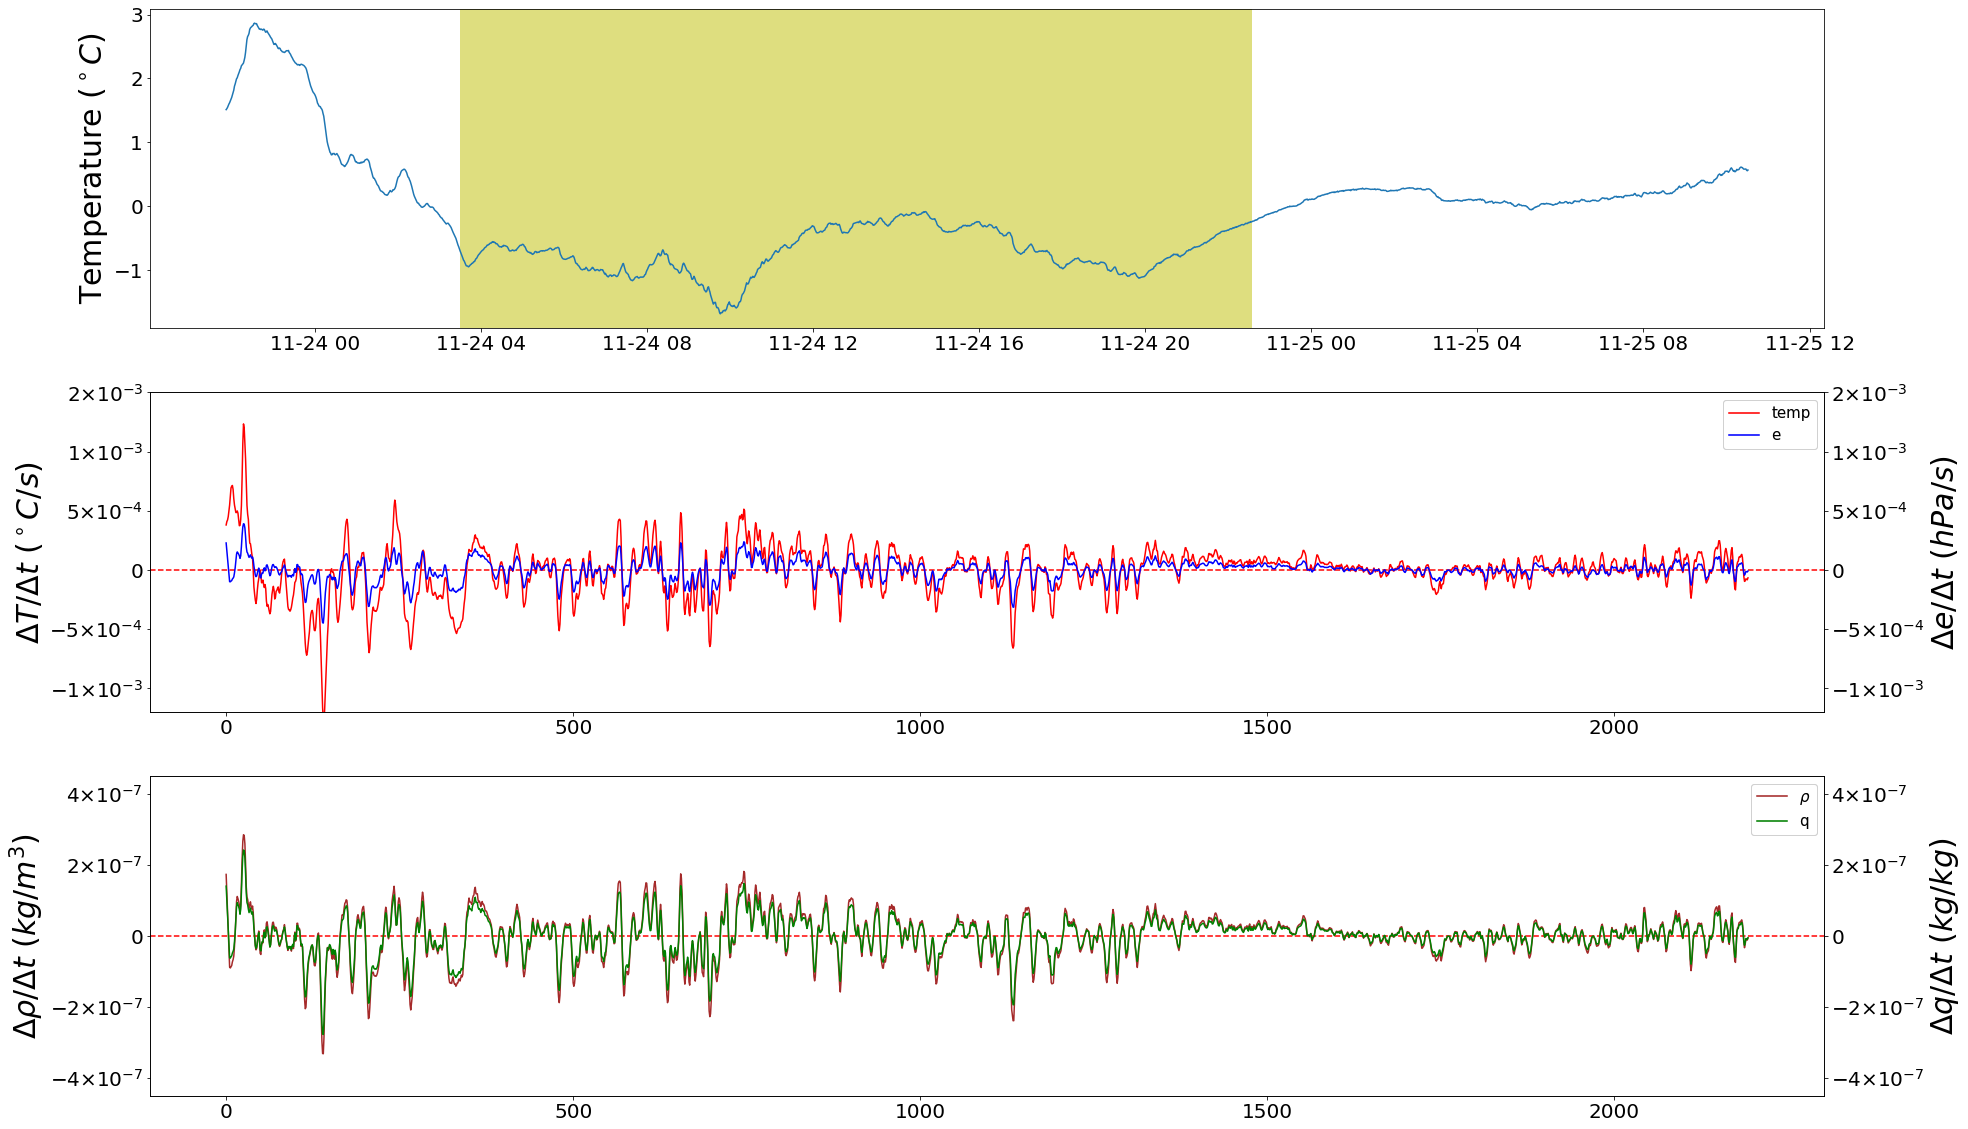

In [16]:
plotting(fog_1, a =a1 , b =b1, delta_temp= delta_t1_f1, delta_e= delta_e1_f1,
         delta_d= delta_d1_f1, delta_q=delta_q1_f1,x1=-12*10**-4,x2=15*10**-4,y1=-4.5*10**-7,y2=4.5*10**-7)

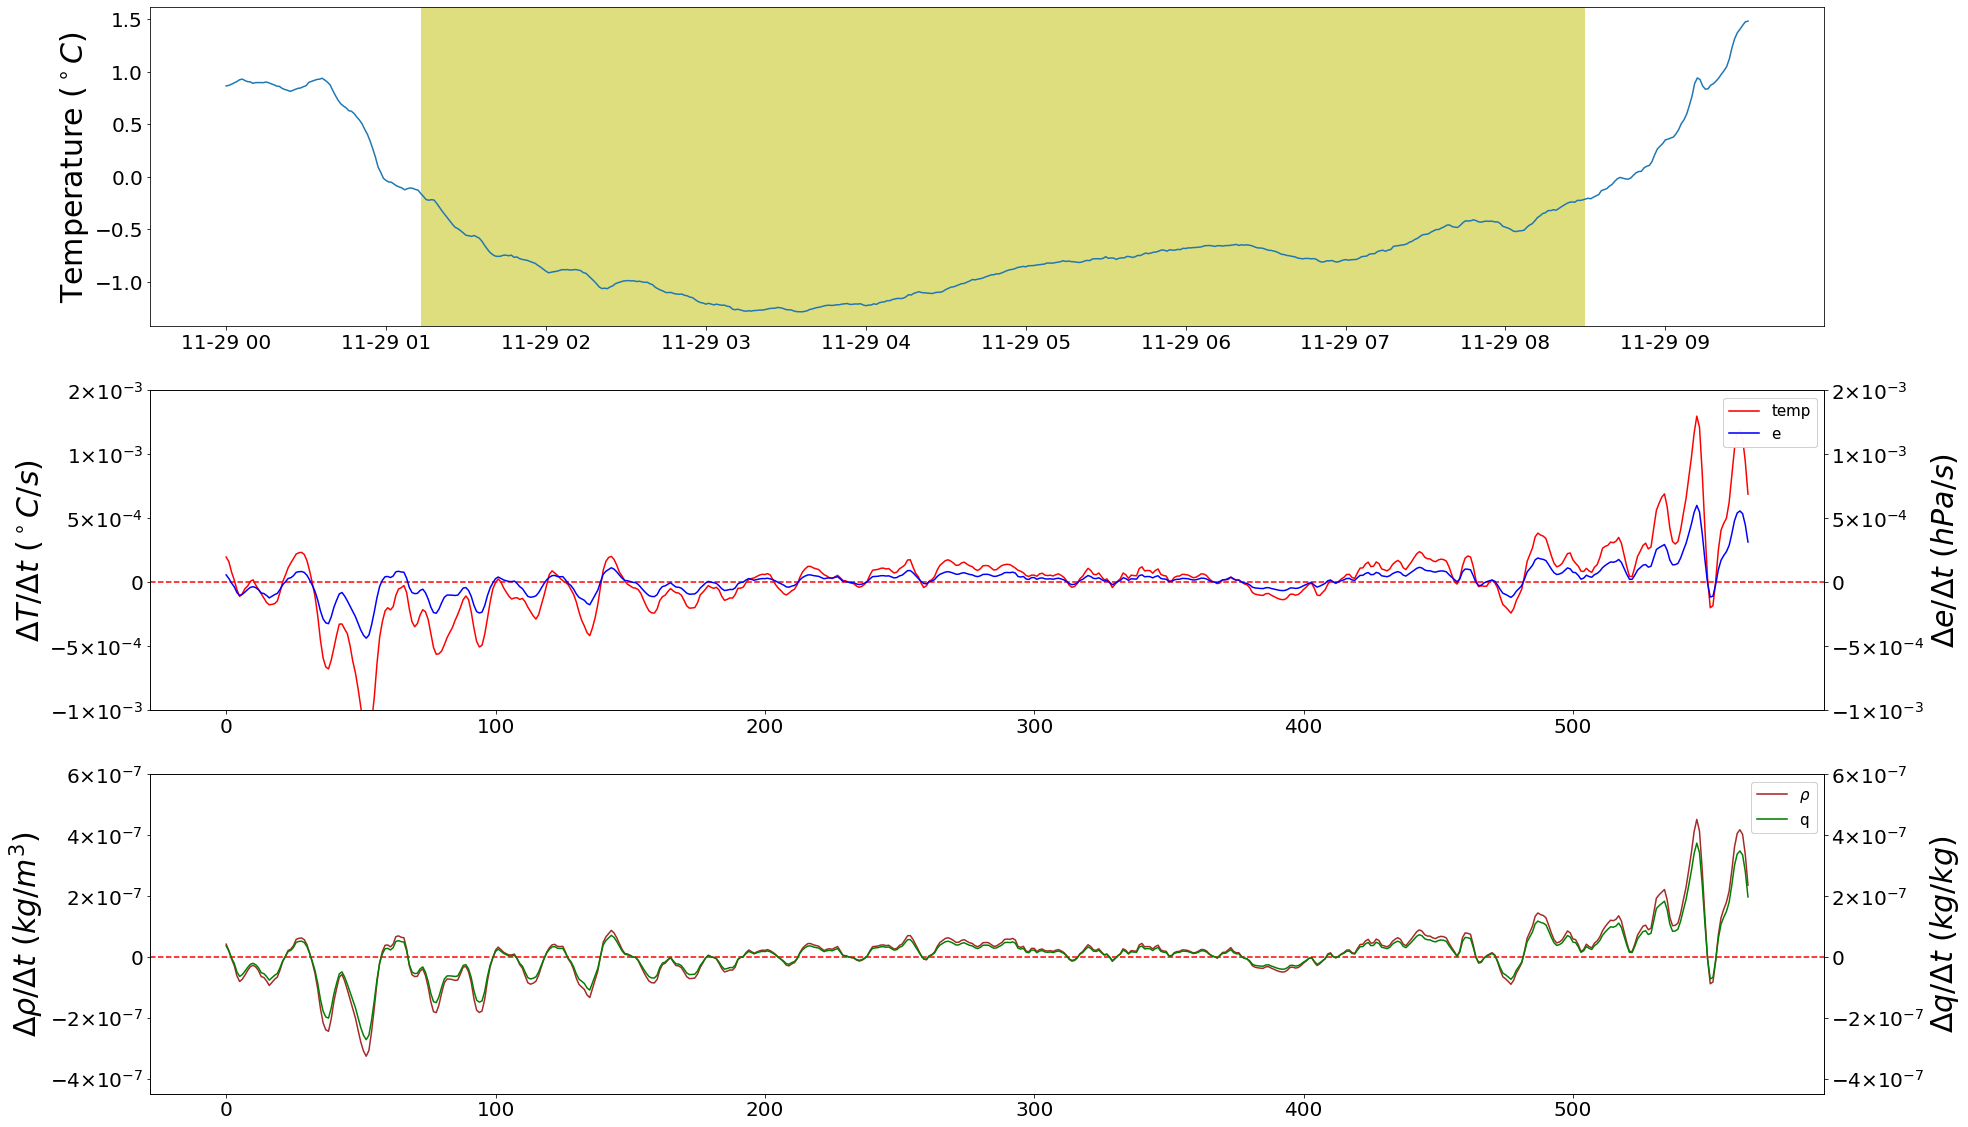

In [17]:
plotting(fog_2, a =a2 , b =b2, delta_temp= delta_t1_f2, delta_e= delta_e1_f2,
         delta_d= delta_d1_f2, delta_q=delta_q1_f2,x1=-10*10**-4,x2=15*10**-4,y1=-4.5*10**-7,y2=6*10**-7)

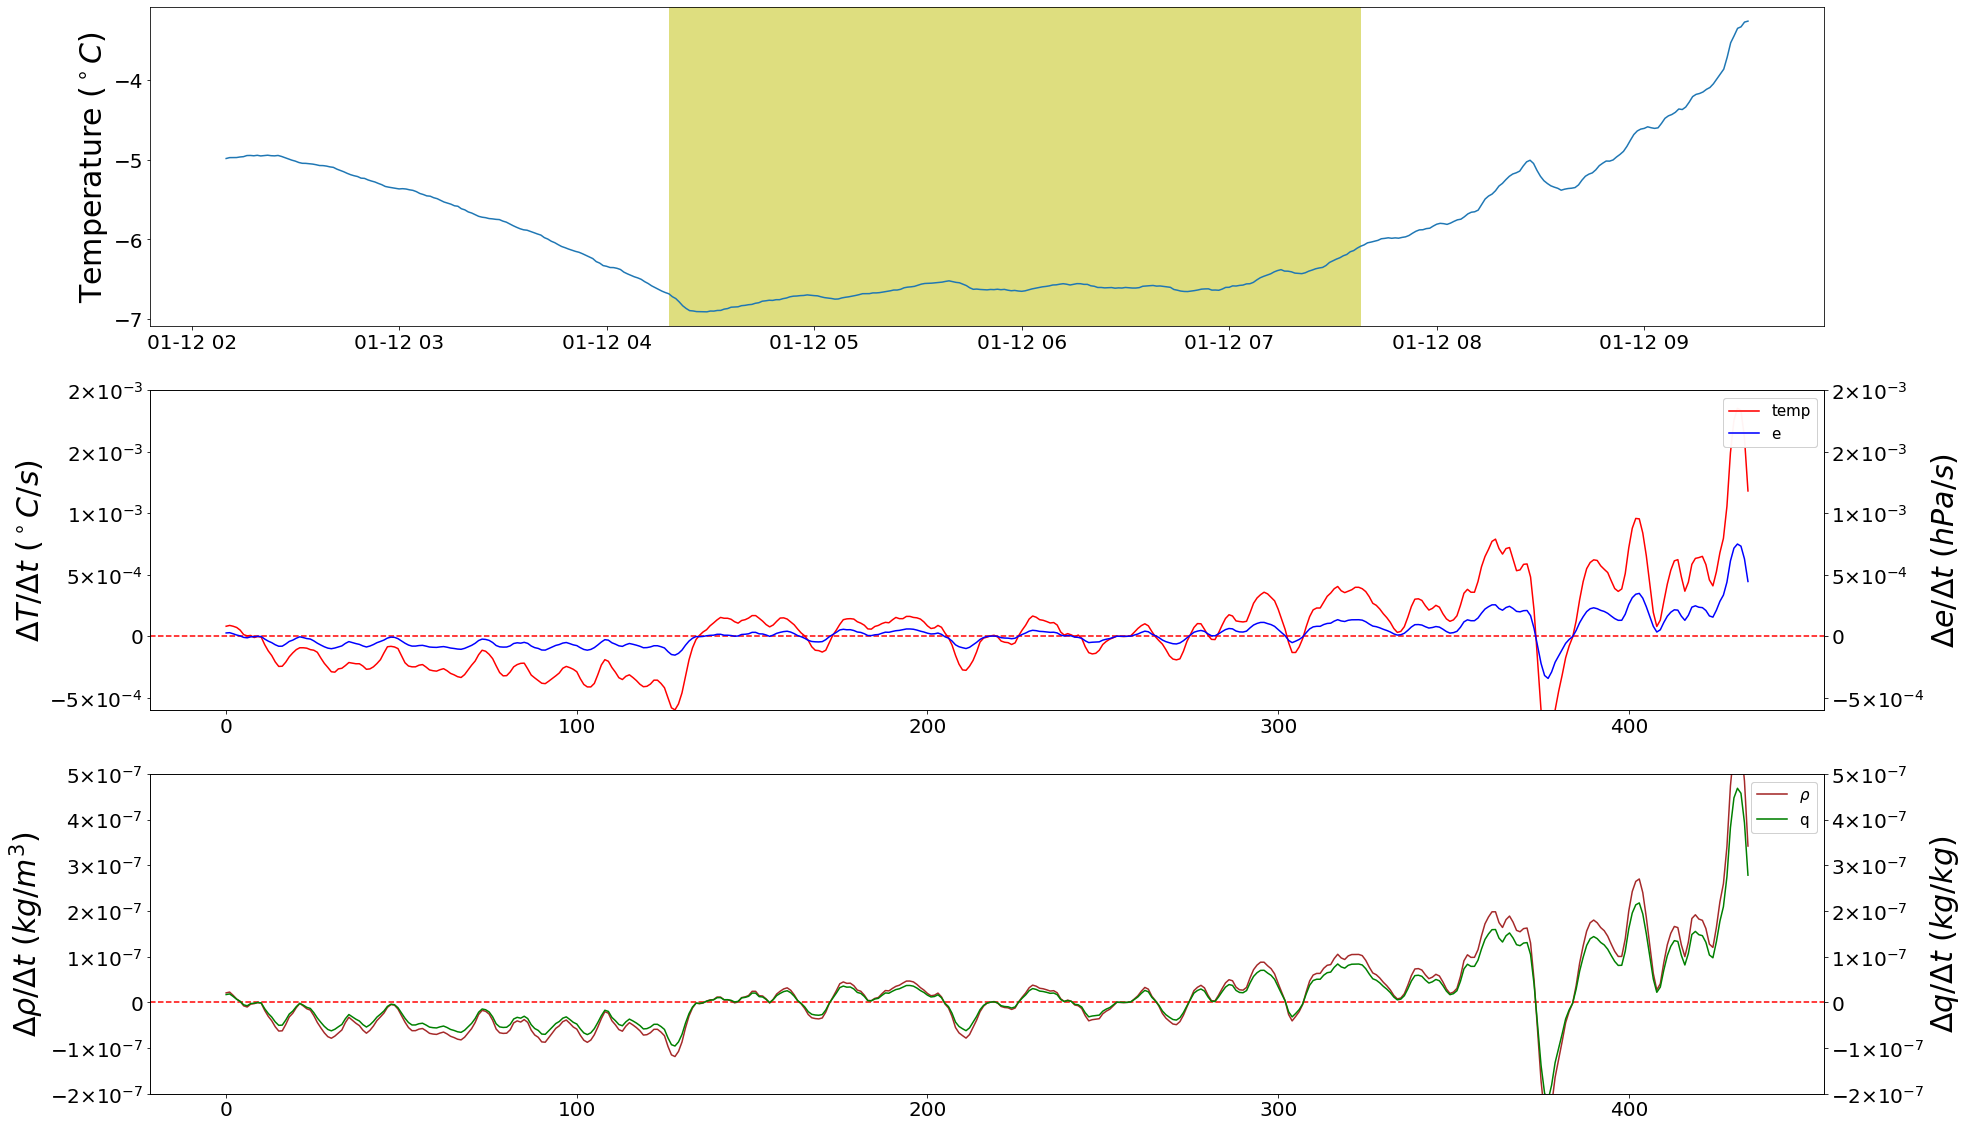

In [18]:
plotting(fog_3, a =a3 , b =b3, delta_temp= delta_t1_f3, delta_e= delta_e1_f3,
         delta_d= delta_d1_f3, delta_q=delta_q1_f3,x1=-6*10**-4,x2= 20*10**-4,y1=-2*10**-7,y2=5*10**-7)

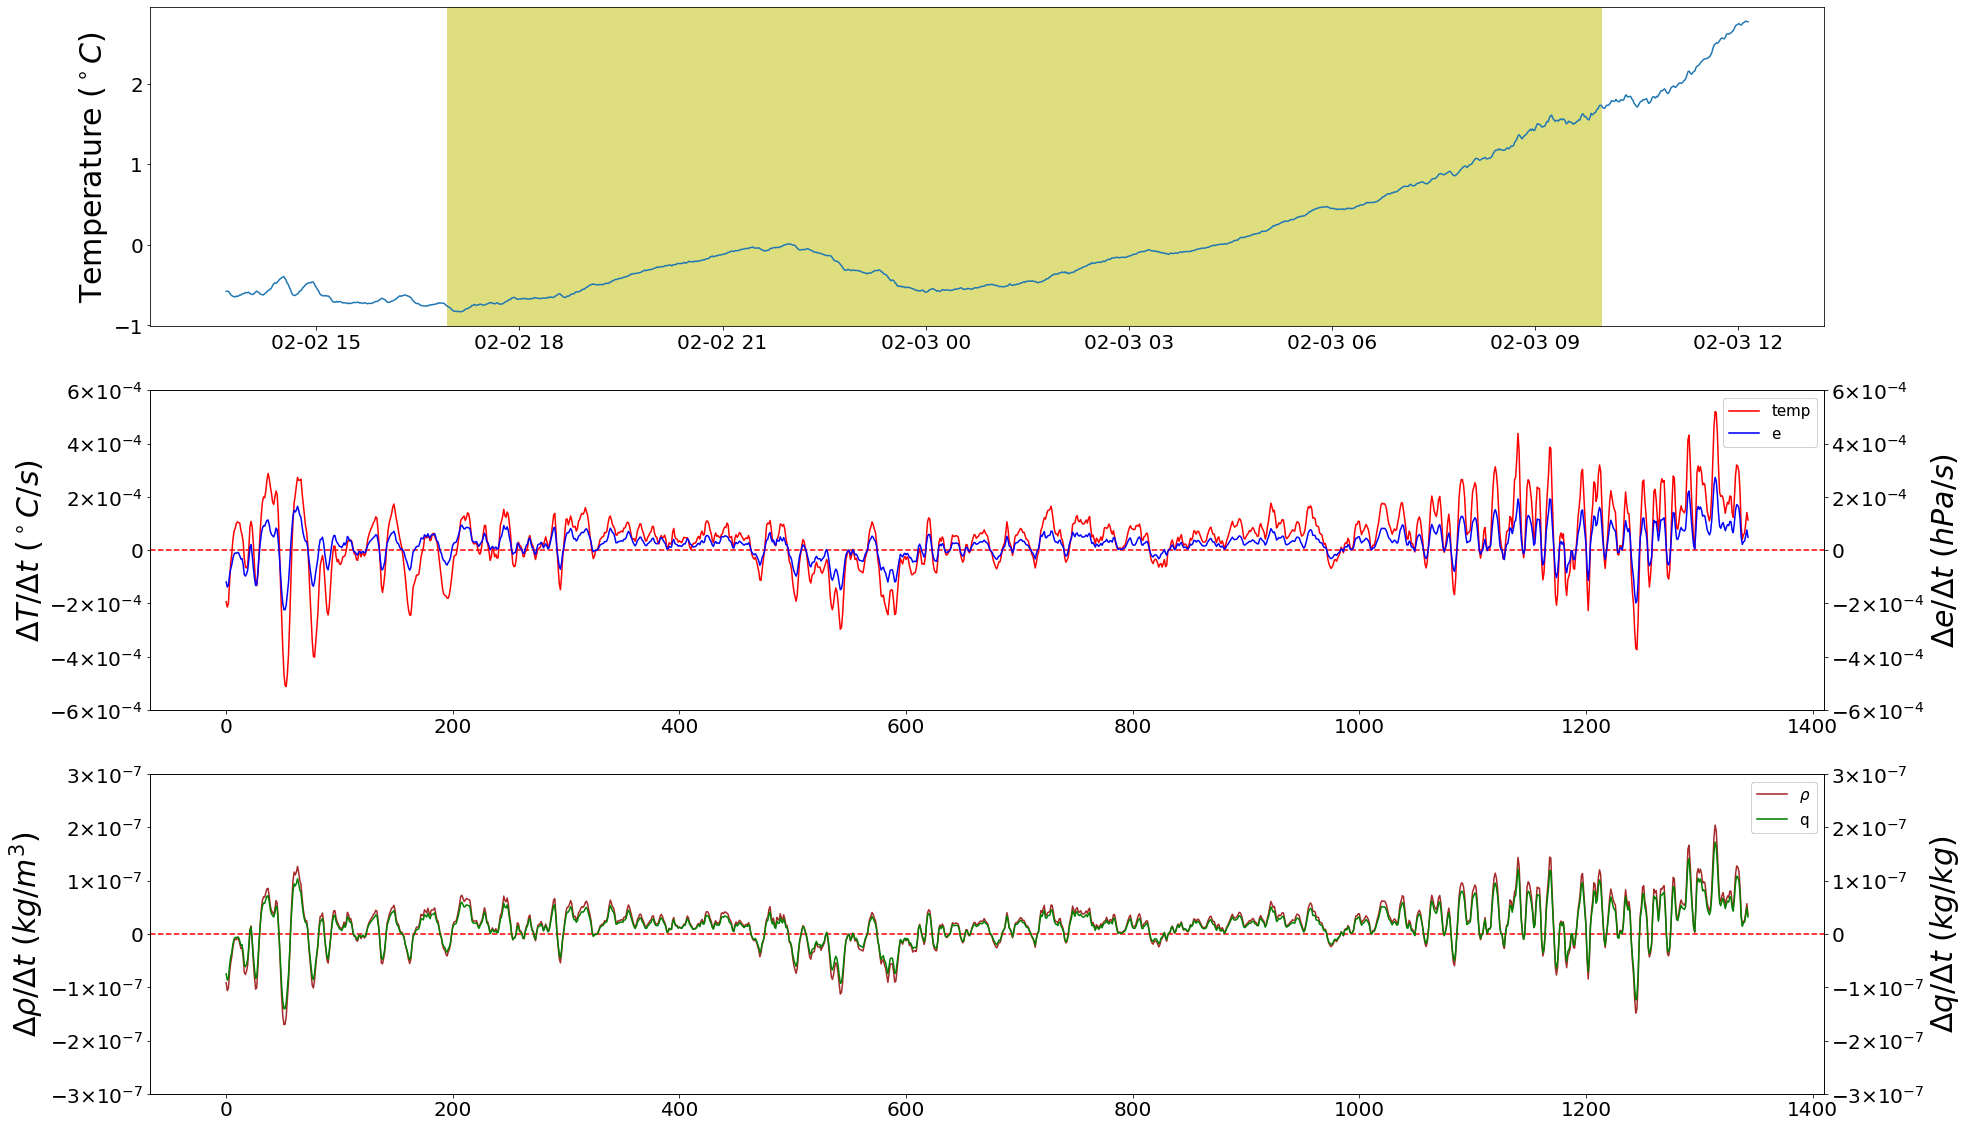

In [19]:
plotting(fog_4, a =a4 , b =b4, delta_temp= delta_t1_f4, delta_e= delta_e1_f4,
         delta_d= delta_d1_f4, delta_q=delta_q1_f4,x1=-6*10**-4,x2=6*10**-4,y1=-3*10**-7,y2=3*10**-7)

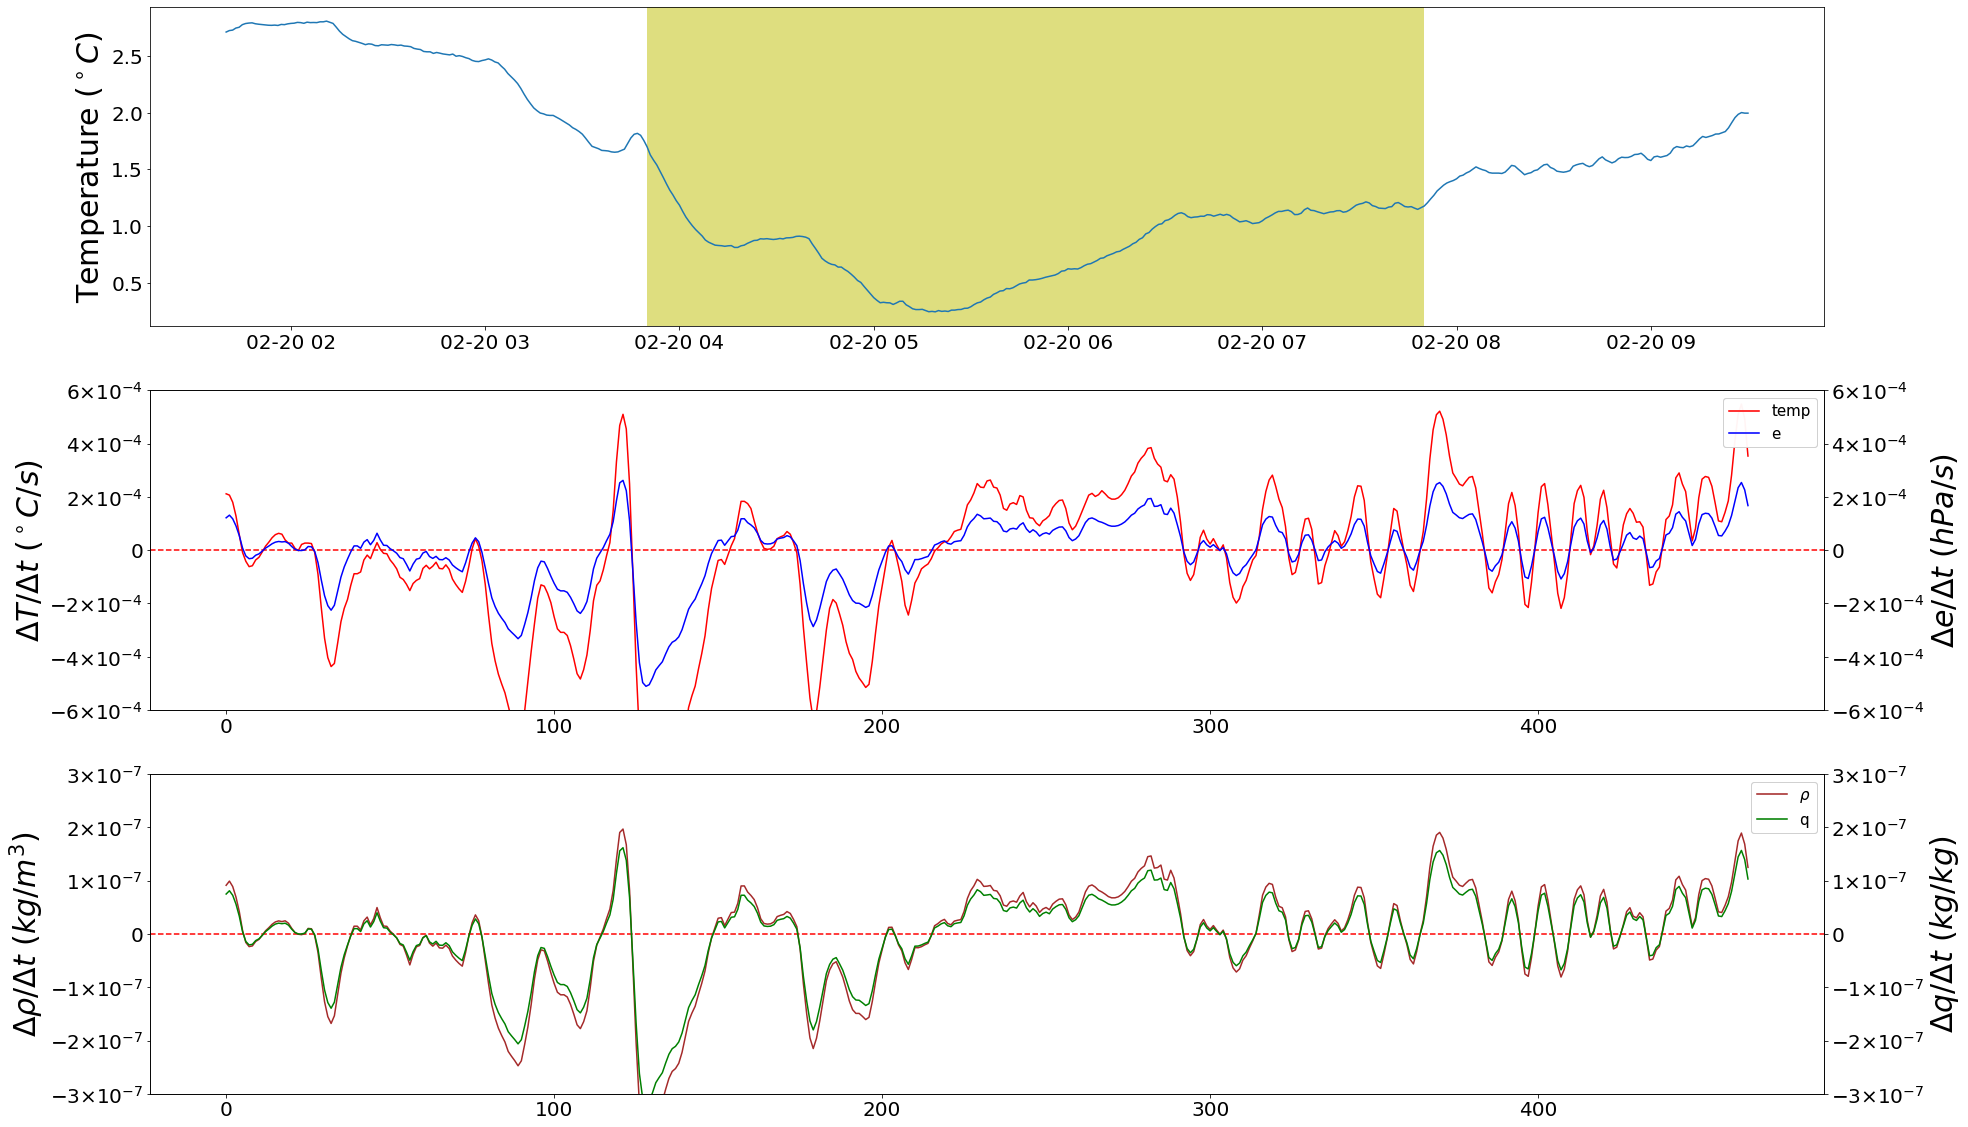

In [20]:
plotting(fog_5, a =a5 , b =b5, delta_temp= delta_t1_f5, delta_e= delta_e1_f5,
         delta_d= delta_d1_f5, delta_q=delta_q1_f5,x1=-6*10**-4,x2=6*10**-4,y1=-3*10**-7,y2=3*10**-7)

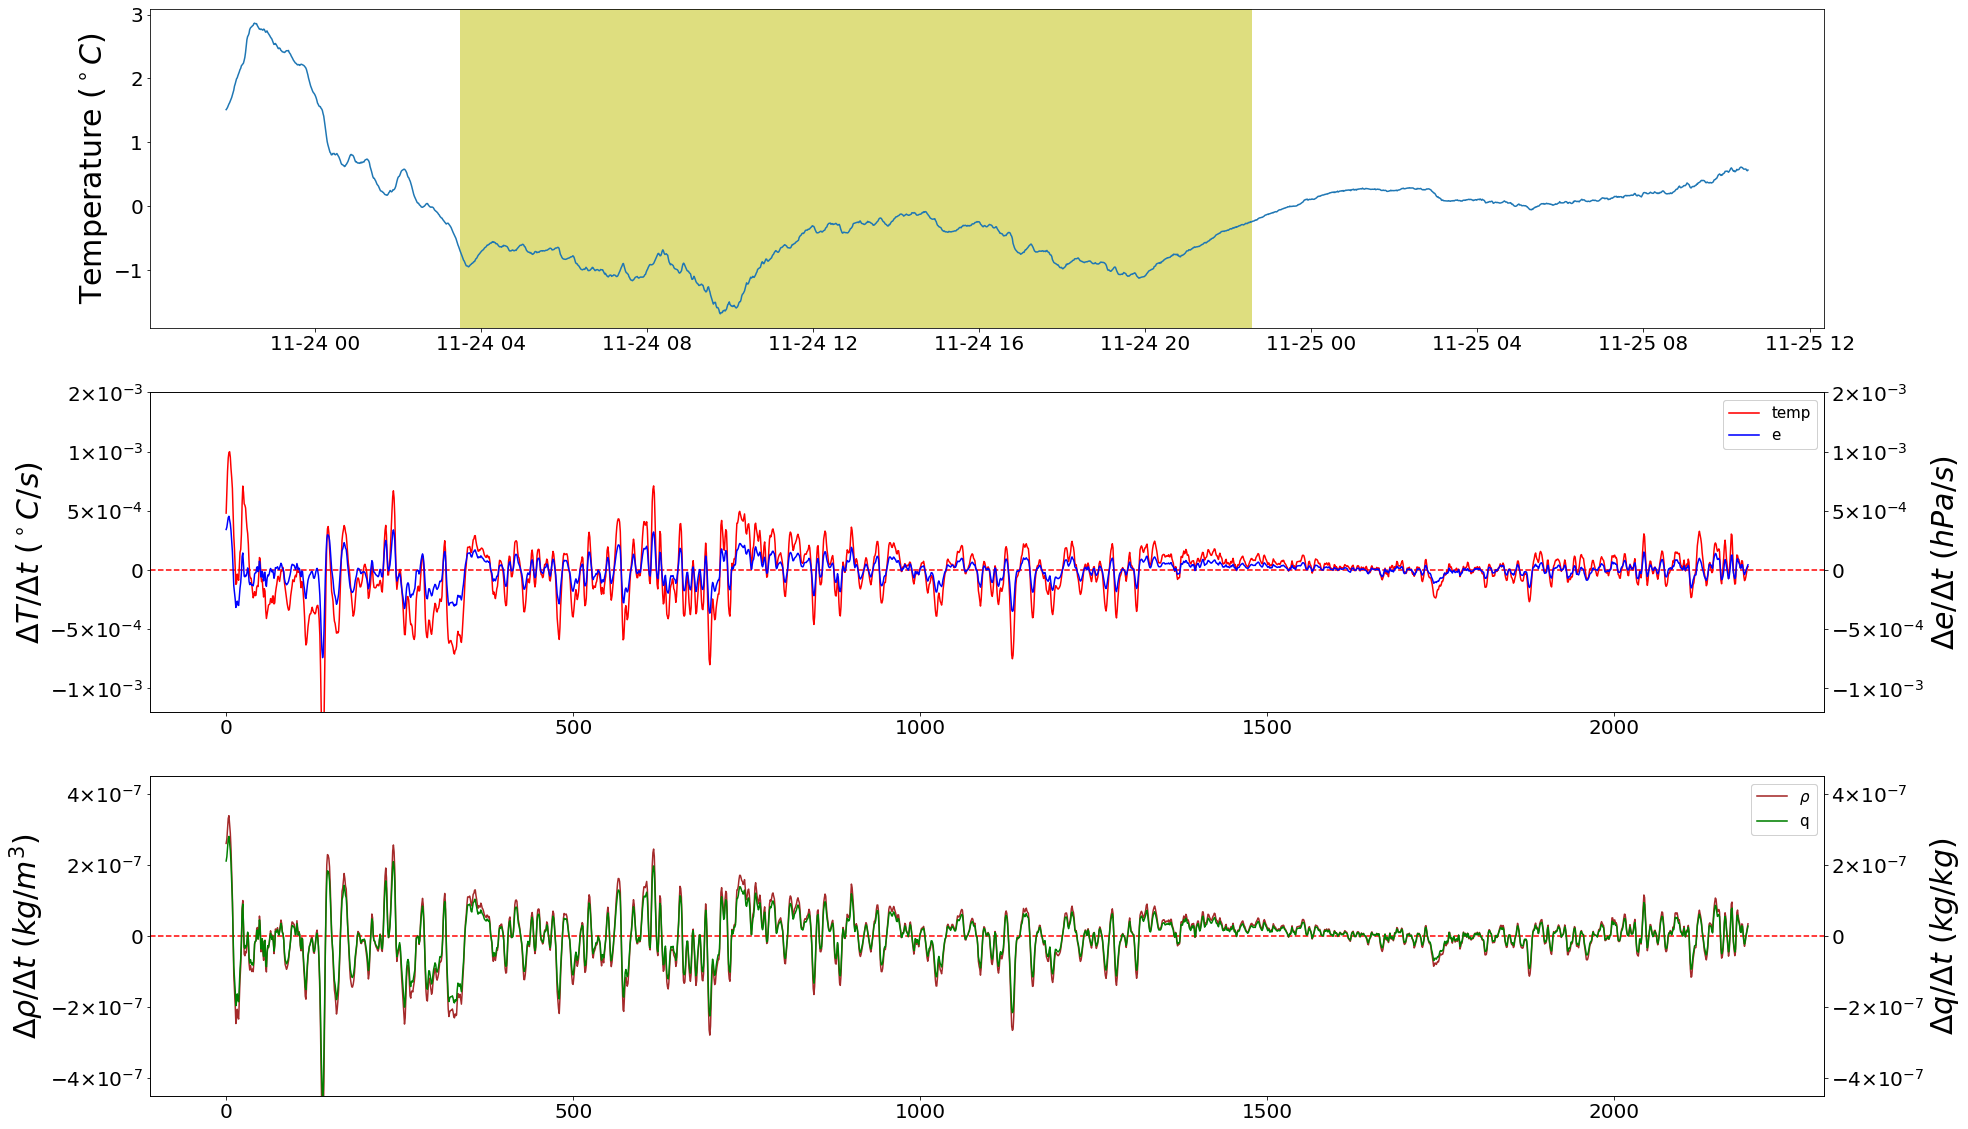

In [21]:
plotting(fog_1, a =a1 , b =b1, delta_temp= delta_t2_f1, delta_e= delta_e2_f1,
         delta_d= delta_d2_f1, delta_q=delta_q2_f1,x1=-12*10**-4,x2=15*10**-4,y1=-4.5*10**-7,y2=4.5*10**-7)

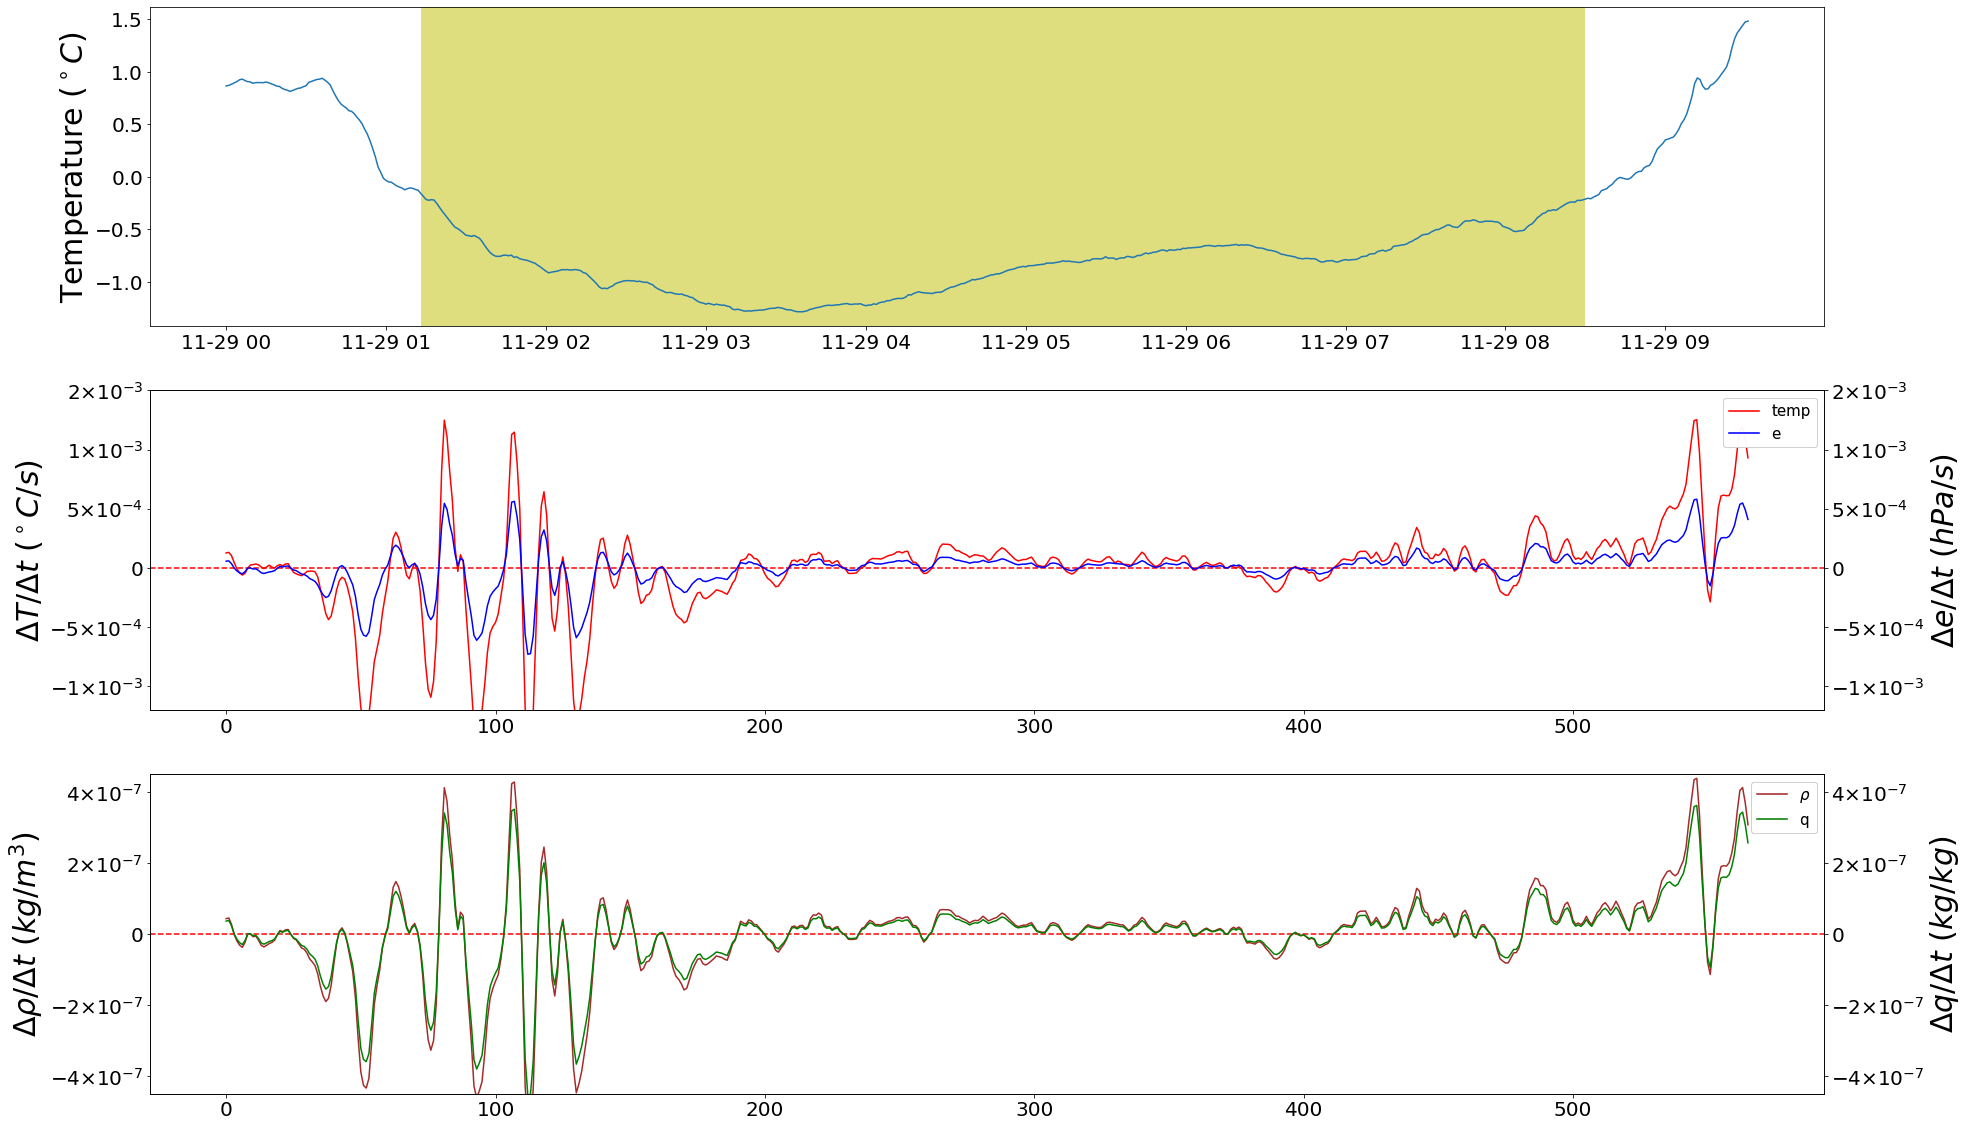

In [22]:
plotting(fog_2, a =a2 , b =b2, delta_temp= delta_t2_f2, delta_e= delta_e2_f2,
         delta_d= delta_d2_f2, delta_q=delta_q2_f2,x1=-12*10**-4,x2=15*10**-4,y1=-4.5*10**-7,y2=4.5*10**-7)

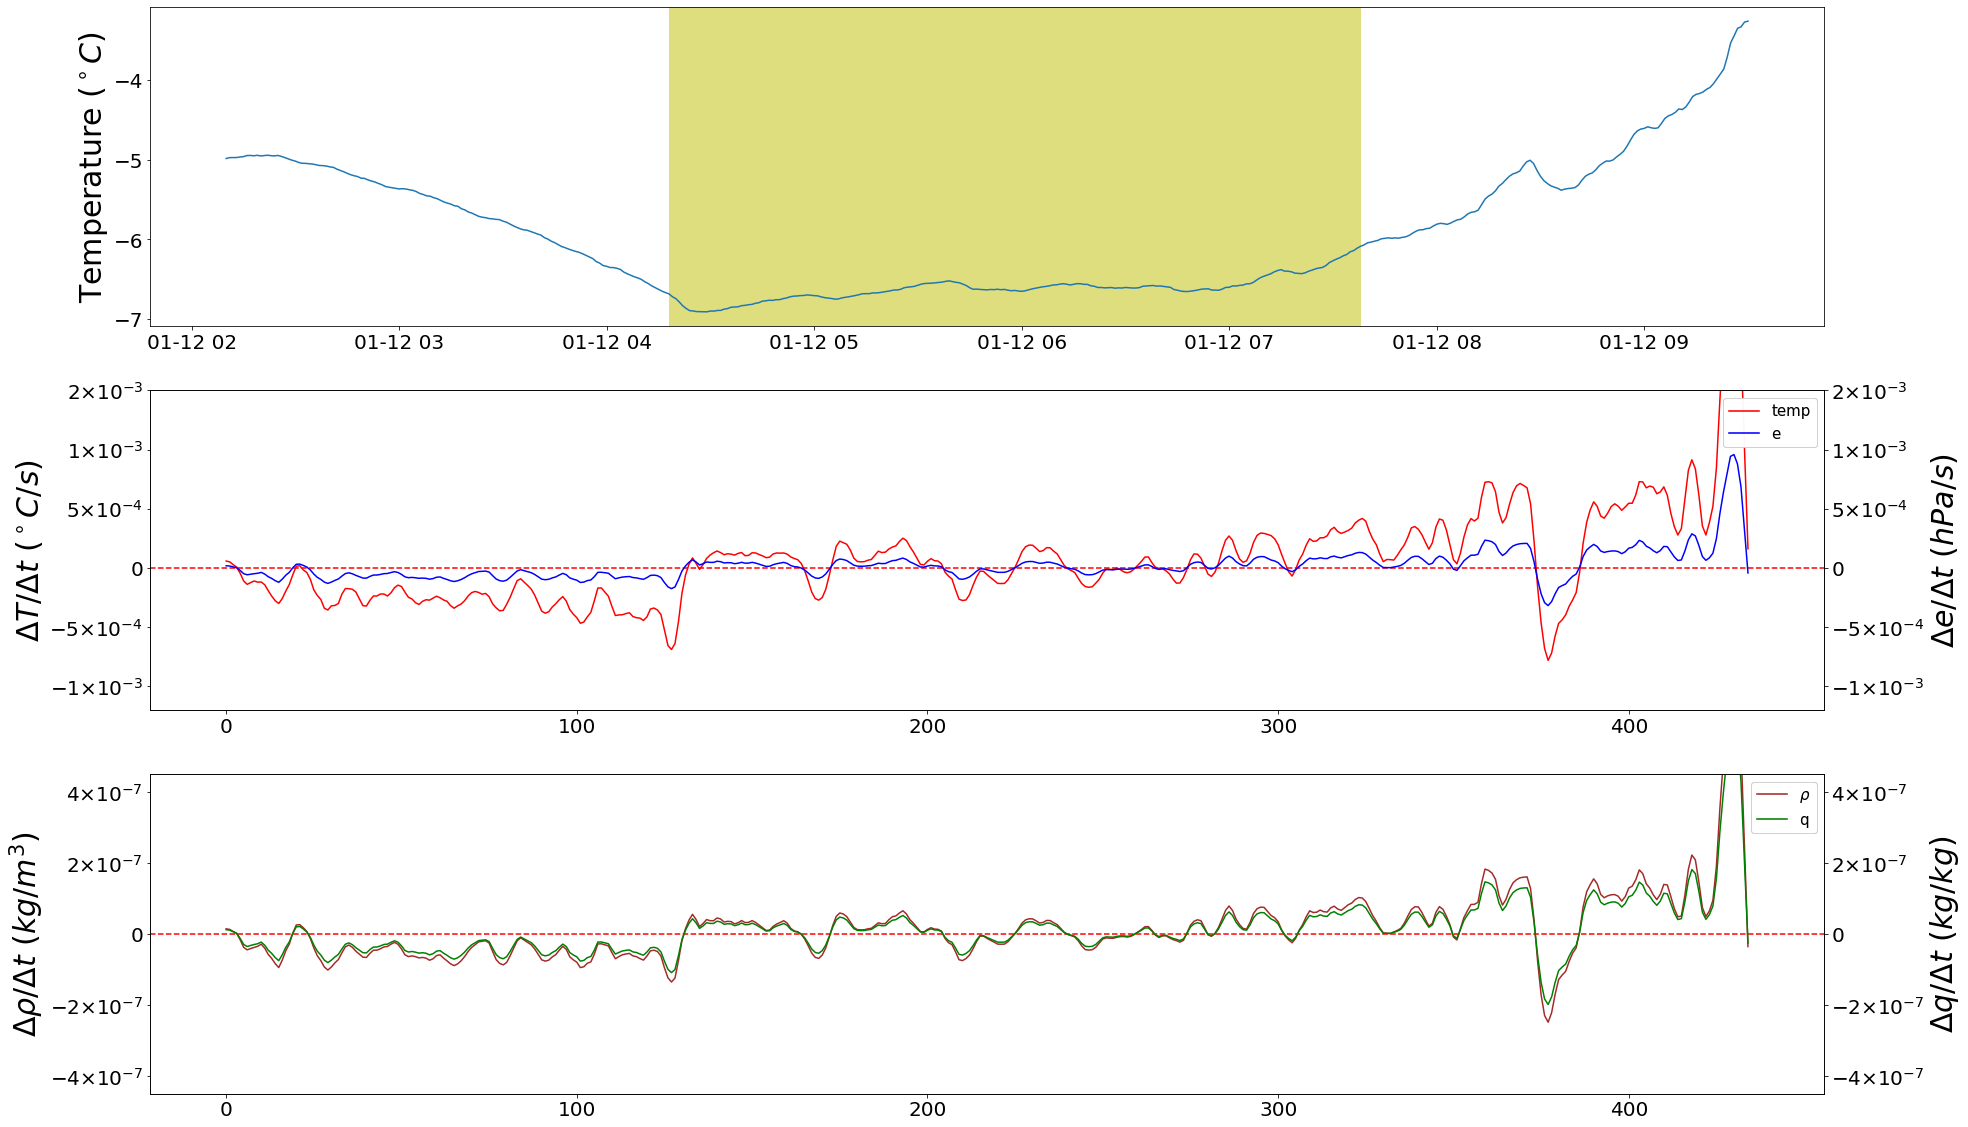

In [23]:
plotting(fog_3, a =a3 , b =b3, delta_temp= delta_t2_f3, delta_e= delta_e2_f3,
         delta_d= delta_d2_f3, delta_q=delta_q2_f3,x1=-12*10**-4,x2=15*10**-4,y1=-4.5*10**-7,y2=4.5*10**-7)

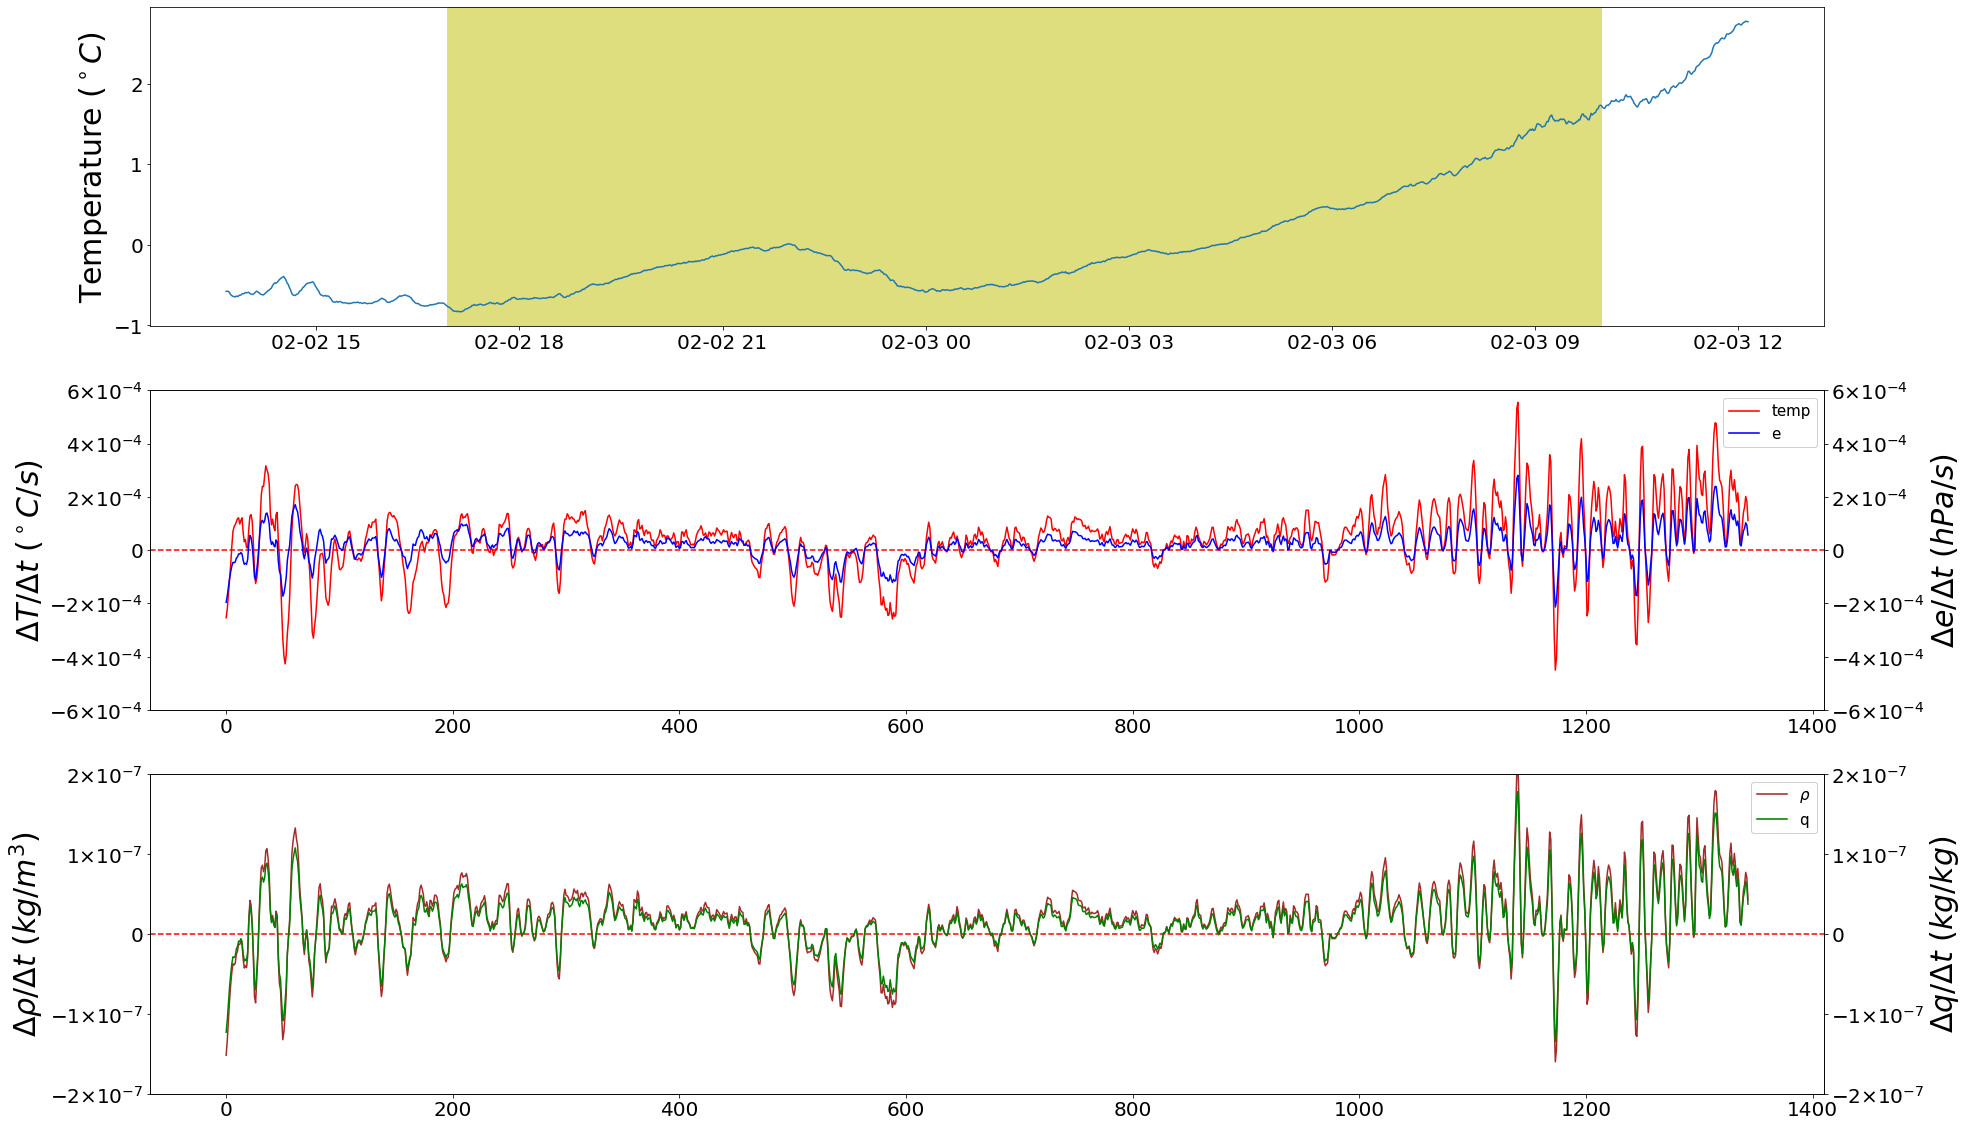

In [24]:
plotting(fog_4, a =a4 , b =b4, delta_temp= delta_t2_f4, delta_e= delta_e2_f4,
         delta_d= delta_d2_f4, delta_q=delta_q2_f4,x1=-6*10**-4,x2=6*10**-4,y1=-2*10**-7,y2=2*10**-7)

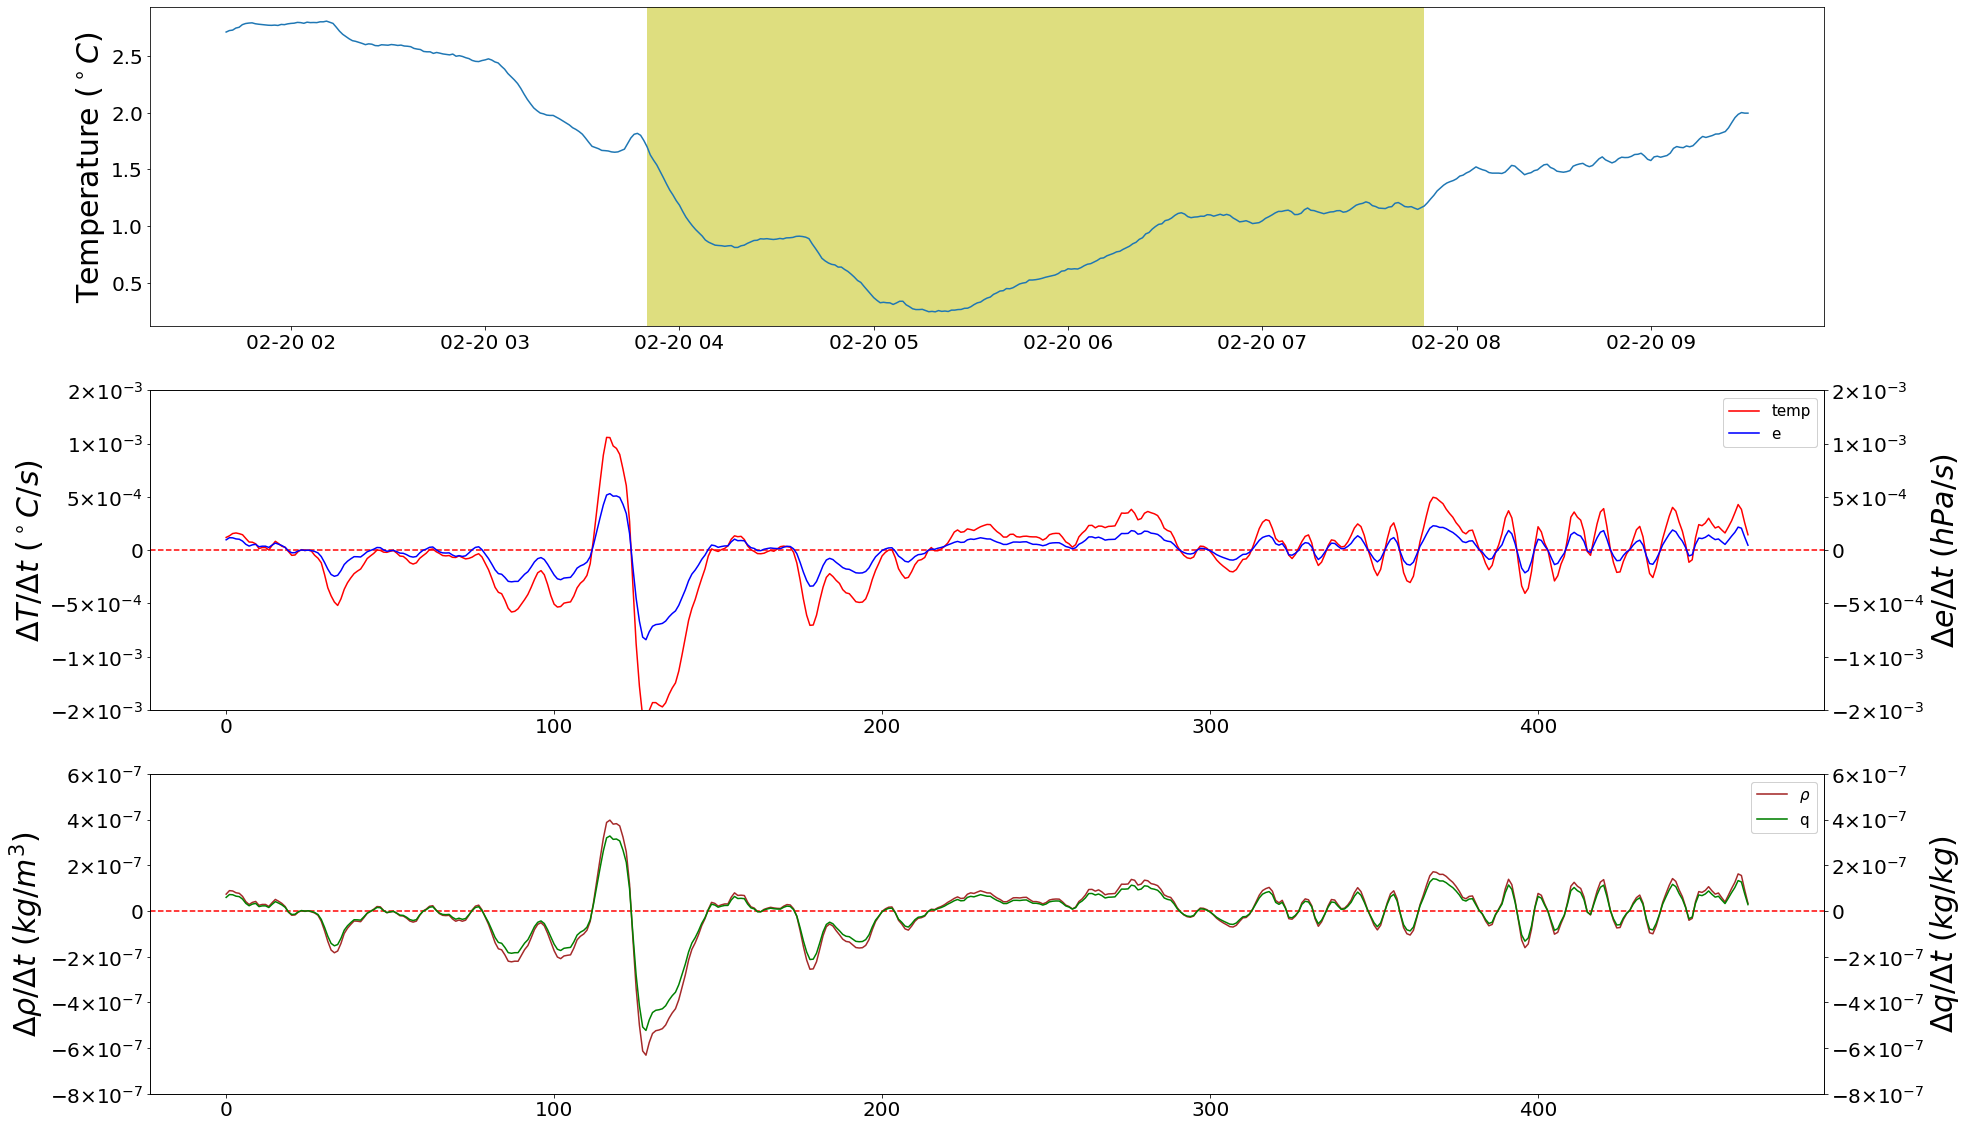

In [25]:
plotting(fog_5, a =a5 , b =b5, delta_temp= delta_t2_f5, delta_e= delta_e2_f5,
         delta_d= delta_d2_f5, delta_q=delta_q2_f5,x1=-15*10**-4,x2=15*10**-4,y1=-8*10**-7,y2=6*10**-7)